## RL Lab 04 - Q-learning(table) exploit & exploration and discounted reward

### decaying E-greedy

In [ ]:
for i in range(num_episodes):
    e = 1. / ((i / 100) + 1)
    
    # The Q-Table learning alrogithm
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

### add random noise

In [ ]:
action = np.argmax(Q[state, :] + np.random.rand(1, env.action_space.n) / (i + 1))

### Setup

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(id='FrozenLake-v3',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name': '4x4',
                 'is_slippery': False})
env = gym.make('FrozenLake-v3')

# Initialize tabel with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Discount factor
dis = 0.99
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
rList=[]

env.render()

[2017-07-10 22:27:21,743] Making new env: FrozenLake-v3



SFFF
FHFH
FFFH
HFFG


### Q learing add random noise

In [2]:
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        # Get new state and reward from enviroment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

#### Results

Success rate:0.98
Final Q-Table Value
[[ 0.          0.95099005  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.96059601  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.970299    0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


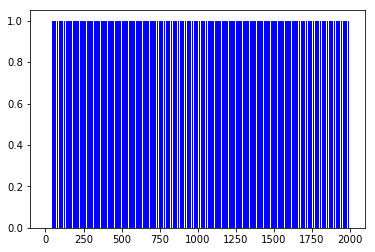

In [9]:
print('Success rate:' + str(sum(rList) / num_episodes))
print('Final Q-Table Value')
print(Q)
plt.bar(range(len(rList)), rList, color='b')
plt.show()

### Q learing E-greedy

Success rate:0.98
Final Q-Table Value
[[ 0.          0.95099005  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.96059601  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.970299    0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


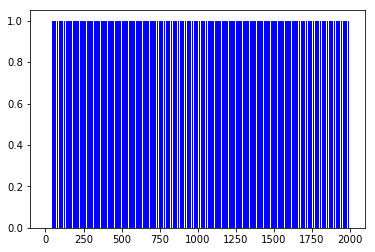

In [8]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
rList=[]

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    e = 1. / ((i // 100) + 1)
    
    # The Q-Table learning alrogithm
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        # Get new state and reward from enviroment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

print('Success rate:' + str(sum(rList) / num_episodes))
print('Final Q-Table Value')
print(Q)
plt.bar(range(len(rList)), rList, color='b')
plt.show()